In [1]:
# Importing libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout

In [2]:
# loading data set
stock = pd.read_csv('Nvidia.csv')

In [3]:
stock.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2017-01-26,26.624082,27.129914,26.327984,27.055891,45880000,0.0,0.0
1,2017-01-27,27.124978,27.608603,26.858490,27.578993,47199600,0.0,0.0
2,2017-01-30,27.369262,27.391470,26.626552,27.147188,49600400,0.0,0.0
3,2017-01-31,26.883162,27.154586,26.698101,26.939915,36275600,0.0,0.0
4,2017-02-01,27.285365,28.158852,27.107706,28.116903,59000400,0.0,0.0


In [4]:
#checking datatype
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1259 non-null   object 
 1   Open          1259 non-null   float64
 2   High          1259 non-null   float64
 3   Low           1259 non-null   float64
 4   Close         1259 non-null   float64
 5   Volume        1259 non-null   int64  
 6   Dividends     1259 non-null   float64
 7   Stock Splits  1259 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 78.8+ KB


In [5]:
# Changing dtype of date to datetime
dates = pd.to_datetime(stock['Date'])
dates.tail()

1254   2022-01-19
1255   2022-01-20
1256   2022-01-21
1257   2022-01-24
1258   2022-01-25
Name: Date, dtype: datetime64[ns]

In [6]:
# checking for null values
stock.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [8]:
#creating training df
training_df = stock.drop(['Date','Volume','Dividends','Stock Splits'],axis = 1)
training_df.head()

,Open,High,Low,Close
0,26.624082,27.129914,26.327984,27.055891
1,27.124978,27.608603,26.858490,27.578993
2,27.369262,27.391470,26.626552,27.147188
3,26.883162,27.154586,26.698101,26.939915
4,27.285365,28.158852,27.107706,28.116903


In [9]:
training_df.shape

(1259, 4)

In [10]:
#Scaling
scaler = StandardScaler()
scaler = scaler.fit(training_df)
training_df_scaled = scaler.transform(training_df)

In [11]:
training_df_scaled

array([[-0.91860186, -0.91561969, -0.91989398, -0.91375856],
       [-0.91128933, -0.90876181, -0.91196646, -0.90610606],
       [-0.90772306, -0.91187255, -0.91543238, -0.91242296],
       ...,
       [ 2.12447916,  2.25194651,  2.16294428,  2.10983914],
       [ 1.95265005,  2.04521679,  1.80804029,  2.1095465 ],
       [ 1.98418373,  1.98261031,  1.97421   ,  1.95623384]])

In [12]:
training_df_scaled.shape

(1259, 4)

In [14]:
len(training_df_scaled)

1259

In [15]:
training_df_scaled

array([[-0.91860186, -0.91561969, -0.91989398, -0.91375856],
       [-0.91128933, -0.90876181, -0.91196646, -0.90610606],
       [-0.90772306, -0.91187255, -0.91543238, -0.91242296],
       ...,
       [ 2.12447916,  2.25194651,  2.16294428,  2.10983914],
       [ 1.95265005,  2.04521679,  1.80804029,  2.1095465 ],
       [ 1.98418373,  1.98261031,  1.97421   ,  1.95623384]])

In [16]:
#Splitting dataset
n_future = 1
n_past = 14

In [17]:
X_train = []
y_train = []

In [18]:
for i in range(n_past, len(training_df_scaled) - n_future +1):
    X_train.append(training_df_scaled[i - n_past:i, 0:training_df_scaled.shape[1]])
    y_train.append(training_df_scaled[i + n_future - 1:i + n_future, 3])

X_train, y_train  = np.array(X_train), np.array(y_train)

In [20]:
X_train.shape

(1245, 14, 4)

In [21]:
X_train.shape

(1245, 14, 4)

In [22]:
y_train.shape

(1245, 1)

In [29]:
#defining a model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
#model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(y_train.shape[1]))

model.compile(optimizer='adam', loss='mse',metrics = ['Accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 64)                17664     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 17,729
Trainable params: 17,729
Non-trainable params: 0
_________________________________________________________________


In [30]:
# fit the model
history = model.fit(X_train, y_train, epochs=5, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/5
70/70 [==============================] - 3s 15ms/step - loss: 0.0431 - Accuracy: 0.0000e+00 - val_loss: 0.5199 - val_Accuracy: 0.0000e+00
Epoch 2/5
70/70 [==============================] - 1s 9ms/step - loss: 0.0119 - Accuracy: 0.0000e+00 - val_loss: 0.2391 - val_Accuracy: 0.0000e+00
Epoch 3/5
70/70 [==============================] - 1s 9ms/step - loss: 0.0106 - Accuracy: 0.0000e+00 - val_loss: 0.2976 - val_Accuracy: 0.0000e+00
Epoch 4/5
70/70 [==============================] - 1s 13ms/step - loss: 0.0104 - Accuracy: 0.0000e+00 - val_loss: 0.0547 - val_Accuracy: 0.0000e+00
Epoch 5/5
70/70 [==============================] - 1s 9ms/step - loss: 0.0107 - Accuracy: 0.0000e+00 - val_loss: 0.0427 - val_Accuracy: 0.0000e+00


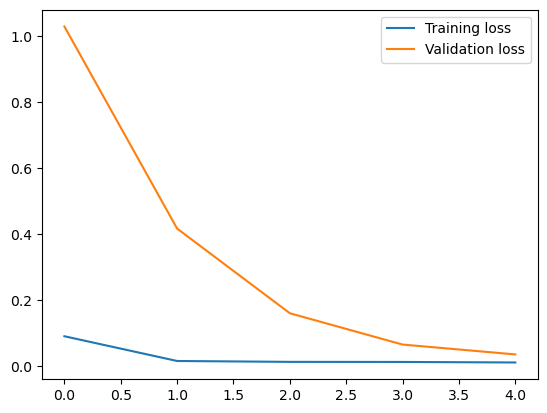

In [28]:
#Plotting lot
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()